<a href="https://colab.research.google.com/github/chenwjtj/test/blob/master/%E5%85%A8%E8%BF%9E%E6%8E%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [2]:
%tensorflow_version 2.x

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


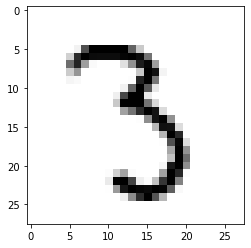

In [5]:
plt.imshow(x_train[8888],cmap='Greys')

In [6]:
print(y_train[8888])

3


In [7]:
x_train=x_train/255

In [8]:
x_test=x_test/255

In [9]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [10]:
x_test.shape

(10000, 784)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [13]:
y_train[8888]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [15]:
model=Sequential()


In [16]:
model.add(Dense(87,input_dim=784,activation='relu'))
model.add(Dense(87,activation='relu'))


In [17]:
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(loss='mse',optimizer=SGD(learning_rate=0.087),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
600/600 [==============================] - 4s 2ms/step - loss: 0.0830 - accuracy: 0.3455
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0553 - accuracy: 0.6596
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.8057
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.8673
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.8838
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.8935
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0161 - accuracy: 0.8996
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9046
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9083
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9114

In [21]:
result=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
def show_pre(n):
  print('神经网络第{}张图是：'.format(n),result[n])
  plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

神经网络第9989张图是： 6


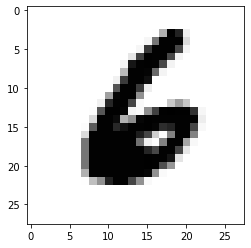

In [23]:
show_pre(9989)